In [219]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [221]:
df =pd.read_csv("student_scores.csv")
df

,hours,scores
0,4.4,20.0
1,9.6,90.0
2,7.6,58.0
3,6.4,31.0
4,2.4,5.0
...,...,...
95,5.4,26.0
96,5.7,32.0
97,4.8,25.0
98,1.2,3.0


In [223]:
df.shape

(100, 2)

In [225]:
import matplotlib.pyplot as plt

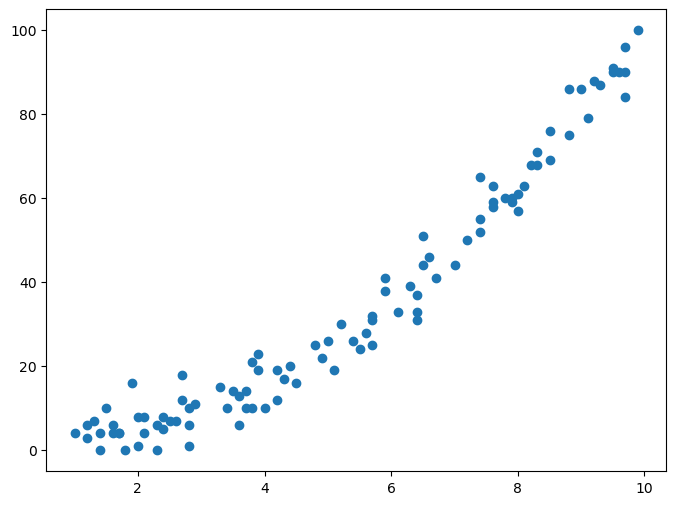

In [227]:
plt.figure(figsize=(8,6))
plt.scatter(df.hours,df.scores)
plt.show()

In [229]:
x =df[["hours"]]
y = df["scores"]

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [233]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25, random_state= 5)

In [235]:
model =LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

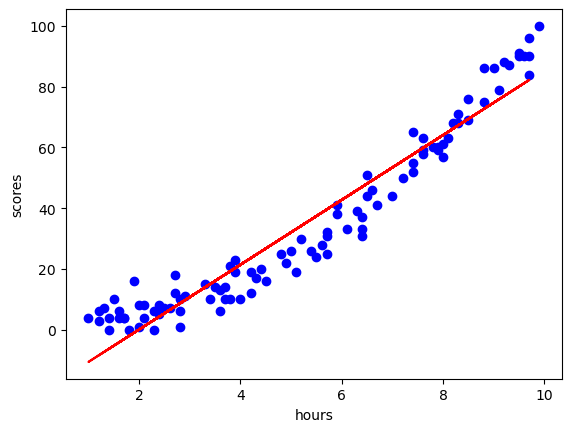

In [237]:
plt.scatter(x,y, color="blue")
plt.plot(x_train,model.predict(x_train), color="red")
plt.xlabel("hours")
plt.ylabel("scores")
plt.show()

In [239]:
model.predict([[4.4]])

array([25.66410173])

In [241]:
from sklearn.preprocessing import PolynomialFeatures

In [265]:
poly =PolynomialFeatures(degree=2)
x_train_poly =poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [266]:
model2 =LinearRegression()
model2.fit(x_train_poly,y_train)

LinearRegression()

In [269]:
model2.predict(poly.fit_transform([[4.4]]))

array([18.57760545])

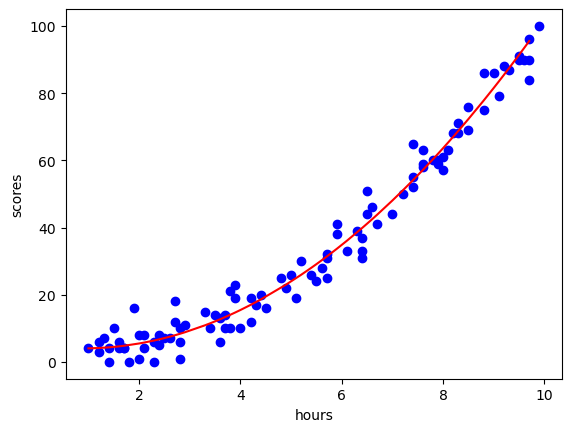

In [271]:
x_sorted =np.sort(x_train, axis=0)
y_pred_sort=model2.predict(poly.transform(x_sorted))
plt.scatter(x,y, color="blue")
plt.plot(x_sorted,y_pred_sort, color="red")
plt.xlabel("hours")
plt.ylabel("scores")
plt.show()
        

In [251]:
model.coef_

array([10.66945464])

In [253]:
model.intercept_

-21.281498694319332

In [257]:
y_pred =model2.predict(x_test_poly)
mse =mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)

In [259]:
y_pred

array([ 6.25315352,  4.89083515, 13.6974115 , 38.7635844 , 54.35319337,
       17.48954944,  4.74133331, 41.40165269, 31.39141189, 68.99979483,
       21.90903981,  5.30503182, 63.93530374,  5.72298943, 19.18300433,
       94.92172579,  4.73515257,  8.06240943, 72.47493017, 98.91881798,
       62.28720095,  5.13846653, 12.35997914, 23.84873053, 24.8548727 ])

In [261]:
mse

20.259972954627816

In [263]:
r2

0.9732576914537647